In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

from imageio import imread
import numpy as np
# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
img = imread("./dog.9500.jpg")

In [3]:
def display_figure(img):
    plt.imshow(img.astype(np.uint8),interpolation="nearest")
    plt.title("{}x{}".format(img.shape[1], img.shape[0]))
    plt.axis("off")

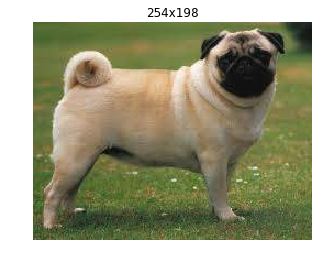

In [4]:
display_figure(img)

In [5]:
img_tensor = tf.convert_to_tensor(img)

## Flip

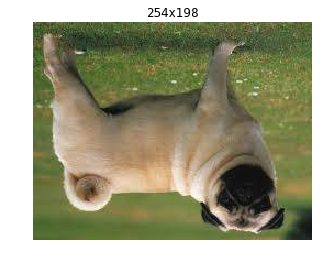

In [6]:
up_img = tf.image.flip_up_down(img_tensor)
display_figure(up_img.numpy())

# plus rand
# tf.image.random_flip_up_down(
#     image,
#     seed=None
# )

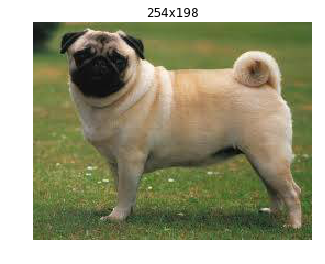

In [7]:
lr_img = tf.image.flip_left_right(img_tensor)
display_figure(lr_img.numpy())
# plus rand
# tf.image.random_flip_left_right(
#     image,
#     seed=None
# )

## Rotate

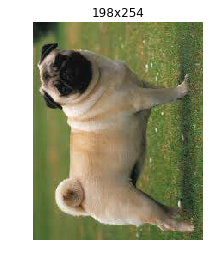

In [8]:
r90_img = tf.image.rot90(img_tensor)
display_figure(r90_img.numpy())

## Image Adjustments

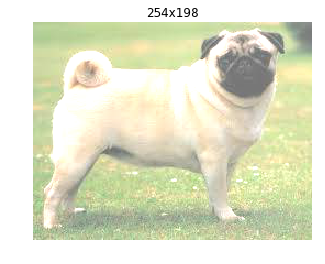

In [9]:
brt_img = tf.image.adjust_brightness(img_tensor, delta=0.4)
display_figure(brt_img.numpy())
# plus rand
# tf.image.random_brightness(
#     image,
#     max_delta,
#     seed=None
# )

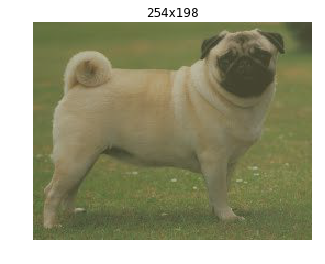

In [10]:
cntrst_img = tf.image.adjust_contrast(img_tensor, 
                                      contrast_factor=0.5)
display_figure(cntrst_img.numpy())
# plus rand
# tf.image.random_contrast(
#     image,
#     lower,
#     upper,
#     seed=None
# )
# contrast_factor randomly picked in the interval [lower, upper]

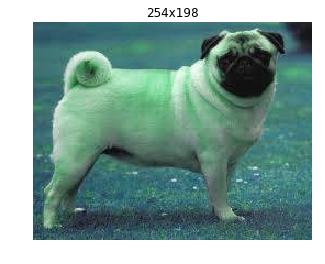

In [11]:
hue_img = tf.image.adjust_hue(img_tensor, 
                                 delta=0.3)
display_figure(hue_img.numpy())
# plus rand
# tf.image.random_hue(
#     image,
#     max_delta,
#     seed=None
# )
# > delta randomly picked in the interval [-max_delta, max_delta]
# > max_delta must be in the interval [0, 0.5]

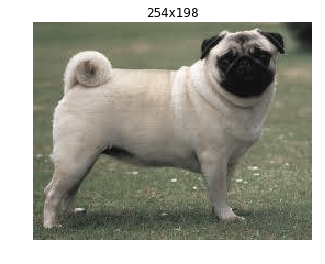

In [12]:
sat_img = tf.image.adjust_saturation(img_tensor, 
                                     saturation_factor=0.4)
display_figure(sat_img.numpy())
# plus rand
# tf.image.random_saturation(
#     image,
#     lower,
#     upper,
#     seed=None
# )
# saturation_factor randomly picked in the interval [lower, upper]

## Combination

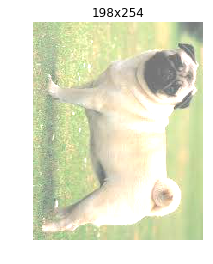

In [13]:
comb_img = tf.image.flip_up_down(img_tensor)
comb_img = tf.image.rot90(comb_img)
comb_img = tf.image.adjust_brightness(comb_img, delta=0.4)
display_figure(comb_img.numpy())

## Standardization (per image)
TODO: not sure about per color channel here...
```
(x - mean) / adjusted_stddev
where:
 - mean = average of all values in image
 - adjusted_stddev = max(stddev, 1.0/sqrt(image.NumElements()))
     - stddev = std of all values in image (capped away from zero)
```

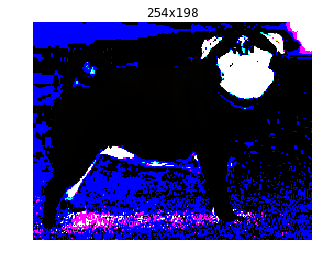

In [14]:
stand_img = tf.image.per_image_standardization(img_tensor)
display_figure(stand_img.numpy())

## All together
> using these simple methods, it is possible to make a single image appear as many other images.

In [15]:
def display_plot(ax, img, name):
    ax.imshow(img.astype(np.uint8),interpolation="nearest")
    ax.set_title("{}".format(name))
    #ax.set_title("Title for first plot")
    ax.axis("off")

def display_figure_and_prob(imgs):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
    display_plot(ax1, imgs[0], "image")
    display_plot(ax2, imgs[1].numpy(), "Up/Down")
    display_plot(ax3, imgs[2].numpy(), "Left/Right")
    display_plot(ax4, imgs[3].numpy(), "rotate90")
    display_plot(ax5, imgs[4].numpy(), "Brightness")
    display_plot(ax6, imgs[5].numpy(), "Contrast")
    display_plot(ax7, imgs[6].numpy(), "Hue")
    display_plot(ax8, imgs[7].numpy(), "Saturation")
    display_plot(ax9, imgs[8].numpy(), "Combination")
    plt.show()

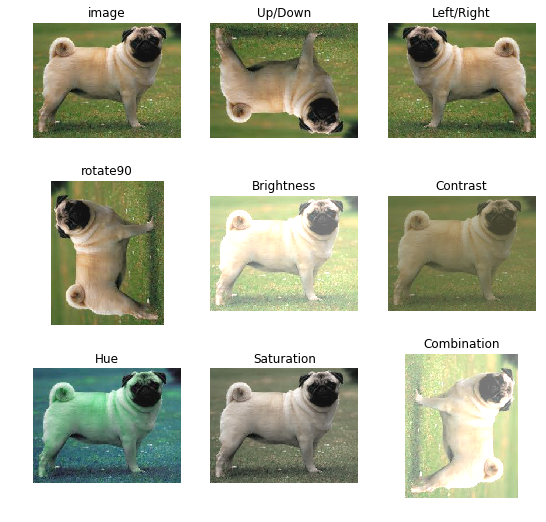

In [16]:
display_figure_and_prob([img, up_img, lr_img, r90_img, brt_img, cntrst_img, hue_img, sat_img, comb_img])